# Business Understanding 
in this project we will take a look at data about video games sales to try to understand and improve the video games industry.
to do that,we came up with these three qustions : 
-  what is the best selling genre ?
-  what is the best selling genre in japan ?
-  what genre have the most games ?

# Data Understanding
in this section we will take a look at the raw data provided by Kaggle,
 to have an understanding of how we can handle the data to prepared it for the data analysis 

In [2]:
#import used libraries
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import ALookAtTheData as t
from collections import Counter
%matplotlib inline

In [3]:
#showing the raw data
df = pd.read_csv('./Video_Games_Sales_as_at_22_Dec_2016.csv')
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#show information about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         7590 non-null float64
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [6]:
#get the number of rows and columns
print("Number of rows:" , df.shape[0]) 
print("Number of columns:" , df.shape[1])

Number of rows: 16719
Number of columns: 16


As we can see the raw data consists of 16 columns and 16719 rows, 
 and based on the number of values for each column, we can see that some of the column have null values that we need to deal with . 

# Data Preparation
to preper the data we will need to drop the unrelated columns, check for duplicates and null values, then drop duplicates and null values if found.


In [7]:
#drop unrelated columns
cleaned = df.drop(["NA_Sales","EU_Sales","Other_Sales","Critic_Score","Critic_Count","User_Score","User_Count","Rating"],axis = 1)
cleaned

,Name,Platform,Year_of_Release,Genre,Publisher,JP_Sales,Global_Sales,Developer
0,Wii Sports,Wii,2006.0,Sports,Nintendo,3.77,82.53,Nintendo
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,6.81,40.24,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,3.79,35.52,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,3.28,32.77,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,10.22,31.37,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,4.22,30.26,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,6.50,29.80,Nintendo
7,Wii Play,Wii,2006.0,Misc,Nintendo,2.93,28.92,Nintendo
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,4.70,28.32,Nintendo
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,0.28,28.31,NaN


In [8]:
#check if there are duplicates 
print(cleaned.duplicated().sum())

0


In [16]:
#drop NA values and reformat Year_of_Release column
cleaned = cleaned.dropna()
cleaned['Year_of_Release']=cleaned['Year_of_Release'].astype(int)
cleaned

,Name,Platform,Year_of_Release,Genre,Publisher,JP_Sales,Global_Sales,Developer
0,Wii Sports,Wii,2006,Sports,Nintendo,3.77,82.53,Nintendo
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,3.79,35.52,Nintendo
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,3.28,32.77,Nintendo
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,6.50,29.80,Nintendo
7,Wii Play,Wii,2006,Misc,Nintendo,2.93,28.92,Nintendo
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,4.70,28.32,Nintendo
11,Mario Kart DS,DS,2005,Racing,Nintendo,4.13,23.21,Nintendo
13,Wii Fit,Wii,2007,Sports,Nintendo,3.60,22.70,Nintendo
14,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,0.24,21.81,Good Science Studio
15,Wii Fit Plus,Wii,2009,Sports,Nintendo,2.53,21.79,Nintendo


# Data analysis

# Question 1: What is the best selling genre ?


In [10]:
#group data based on genre and sort based on total sales
Q1 = cleaned.groupby(["Genre"])["Global_Sales"].sum().sort_values(ascending=False)
Q1

Genre
Action          1338.40
Sports           982.94
Shooter          845.10
Misc             530.78
Racing           526.13
Role-Playing     516.28
Platform         414.69
Simulation       277.92
Fighting         260.30
Adventure        129.79
Puzzle           112.38
Strategy          81.02
Name: Global_Sales, dtype: float64

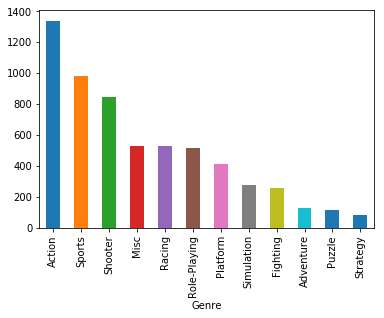

In [11]:
#plot the results 
Q1.plot.bar(x='Genre', y='Global_Sales')

in this figure we can see that the best selling genre globally is the Action genre with 1338 million units sold
and the second best selling genre is sports with 982 million units sold.

# Question 2: What is the best selling genre in japan ?

In [12]:
#gruop by genre and sort by most sales in JP_Sales column
Q2 = cleaned[['Genre', 'JP_Sales']].sort_values('JP_Sales', ascending=False)
Q2 = Q2.groupby(["Genre"])["JP_Sales"].sum().sort_values(ascending=False)
Q2

Genre
Role-Playing    129.22
Action           81.25
Platform         43.32
Sports           37.57
Misc             33.95
Racing           29.00
Simulation       28.90
Fighting         28.60
Shooter          19.09
Puzzle           15.93
Adventure         9.46
Strategy          4.46
Name: JP_Sales, dtype: float64

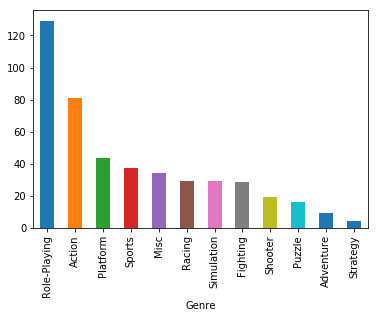

In [13]:
#plot the results
Q2.plot.bar(x = 'Genre', y = 'JP_Sales' )

in this figure we can see that the best selling genre in Japan is Role-Playing with 129 million units sold
and the worst selling genre in Japan is Strategy with only  4.46 million units sold.

which indicates that there is a huge market for the Role-Playing genre in Japan unlike the Strategy genre.  

# Question 3: What genre have the most games ?

In [14]:
#counter the number of game per genre
Q3 = cleaned[['Genre']]
c = Counter(Q3['Genre'])
c

Counter({'Sports': 1495,
         'Racing': 866,
         'Platform': 561,
         'Misc': 866,
         'Action': 2183,
         'Puzzle': 341,
         'Shooter': 1001,
         'Fighting': 434,
         'Simulation': 570,
         'Role-Playing': 781,
         'Adventure': 463,
         'Strategy': 343})

<Container object of 12 artists>

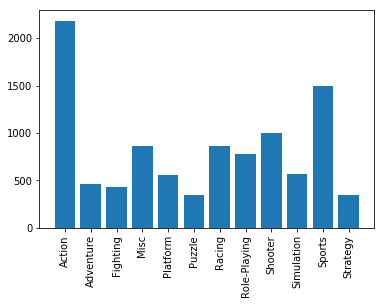

In [15]:
#plot the results
plt.xticks(rotation=90)
plt.bar(c.keys(), c.values())

this bar chart shows the number of games per genre, we can see that the genre with the highest number of games is the Action genre.